Here we are generating a 10kHz sinewave @ 96kHz sampling rate and shifting its pitch up and down by the same ratio. Resulting signal is comared against the reference sinewave.

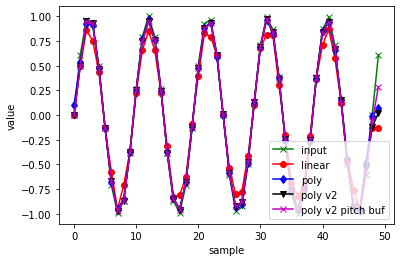

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pitchtools import *

Fs = 96_000
freq = 10_000
n_smp = 50
x = np.arange(n_smp)
sig = np.sin(2 * np.pi * freq * x / Fs)

ratio = 1.77
res = pitch_shift_linear(sig, ratio)
res1 = pitch_shift_linear(res, 1.0 / ratio)
res = pitch_shift_ovs2_poly_6p5o_orig(sig, ratio)
res3 = pitch_shift_ovs2_poly_6p5o_orig(res, 1.0 / ratio)
res = pitch_shift_ovs2_poly_6p5o_v2(sig, ratio)
res4 = pitch_shift_ovs2_poly_6p5o_v2(res, 1.0 / ratio)

# Process with pitch buffer filled with identical values
pitch_buf = np.full((len(res4),), ratio, np.float32)
res = pitch_shift_poly(sig, pitch_buf)
pitch_buf = np.full((len(res4),), 1.0 / ratio, np.float32)
res5 = pitch_shift_poly(res, pitch_buf)

plt.plot(x, sig, 'gx-')
plt.plot(x, res1, 'ro-')
plt.plot(x, res3, 'bd-')
plt.plot(x, res4, 'kv-')
plt.plot(x, res5, 'mx-')
plt.xlabel('sample')
plt.ylabel('value')
plt.legend(['input', 'linear', 'poly', 'poly v2', 'poly v2 pitch buf'], loc='lower right')
plt.show()


Here we are "stretching" the signal looking at how different interpolators are reconstructing missing sample values.

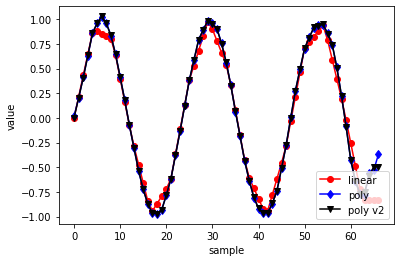

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pitchtools import *

Fs = 96_000
freq = 17_000
n_smp = 16
x = np.arange(n_smp)
sig = np.sin(2 * np.pi * freq * x / Fs)

ratio = 0.24
res1 = pitch_shift_linear(sig, ratio)
res2 = pitch_shift_ovs2_poly_6p5o_orig(sig, ratio)
res3 = pitch_shift_ovs2_poly_6p5o_v2(sig, ratio)
x = np.arange(len(res1))

plt.plot(x, res1, 'ro-')
plt.plot(x, res2, 'bd-')
plt.plot(x, res3, 'kv-')
plt.xlabel('sample')
plt.ylabel('value')
plt.legend(['linear', 'poly', 'poly v2'], loc='lower right')
plt.show()

The following cell processes a mono 96kHz .wav file using linear and polynomial interpolators.

In [ ]:
# Pitch change ratio, e.g. 2.0 = "one octave up" 
RATIO = 1.05946 # one semitone up

import os
from scipy.io import wavfile
import scipy.io
from PyQt5 import QtGui, QtWidgets
from pitchtools import *

# Open file dialog and generate names for output files
app = QtWidgets.QApplication([dir])
fname_in, _ = QtWidgets.QFileDialog.getOpenFileName(None, "Input file", '.', filter="Wav files (*.wav)")
fname_out_linear = os.path.splitext(fname_in)[0] + ".linear.wav"
fname_out_poly = os.path.splitext(fname_in)[0] + ".poly.wav"
fname_out_poly_v2 = os.path.splitext(fname_in)[0] + ".poly_v2.wav"
fname_out_poly_v2 = os.path.splitext(fname_in)[0] + ".poly_v2.wav"

# Read and process .wav file
Fs, sig = wavfile.read(fname_in)
wavfile.write(fname_out_linear, Fs, pitch_shift_linear(sig, RATIO))
wavfile.write(fname_out_poly, Fs, pitch_shift_ovs2_poly_6p5o_orig(sig, RATIO))
wavfile.write(fname_out_poly_v2, Fs, pitch_shift_ovs2_poly_6p5o_v2(sig, RATIO))

Make vibrato effect by modulating pitch of the audio from .wav file.

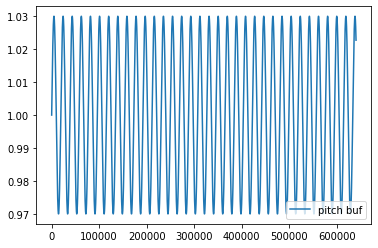

In [1]:
VIBRATO_FREQ = 5
VIBRATO_DEPTH = 0.03

import os
from scipy.io import wavfile
import scipy.io
from PyQt5 import QtGui, QtWidgets
from pitchtools import *

# Open file dialog and generate names for output files
app = QtWidgets.QApplication([dir])
fname_in, _ = QtWidgets.QFileDialog.getOpenFileName(None, "Input file", '.', filter="Wav files (*.wav)")
fname_out = os.path.splitext(fname_in)[0] + ".vibrato.wav"

# Read and process .wav file
Fs, sig = wavfile.read(fname_in)
x = np.arange(round(len(sig) * 1.05))
pitch_buf = 1.0 + VIBRATO_DEPTH * np.sin(2 * np.pi * VIBRATO_FREQ * x / Fs)
res = pitch_shift_poly(sig, pitch_buf)
wavfile.write(fname_out, Fs, res)

# Plot the pitch buf
import matplotlib.pyplot as plt
plt.plot(x, pitch_buf)
plt.legend(['pitch buf'], loc='lower right')
plt.show()